## 2. Data Exploration
#### Written by: Isobel Jones
#### Date: 17th of June

1. Load and deserialise pickled data 
2. Produce word clouds for each of the categories
3. Plot frequencies of word occurances for each different class
4. Check to see whether the distribution follows zipfs law
5. Plot CCDF of Token frequency

In [1]:
import os
import math
import pickle
import operator  # Used to return value from key,value pair in dictionary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

Get Root working dirctory

In [2]:
rootwd = os.path.abspath(os.path.join(os.path.dirname(os.getcwd())))
print('Root Working Directory:\n\n', rootwd)

/Users/isobeljones/DataScience/topic-labelling-system


#### 1. Load and deserialise pickled data

In [3]:
def loadData(path):
    #Open the file for reading
    fileObject = open(path,'rb')

    # load the object from the file into var b
    loadedTweets = pickle.load(fileObject)
    return loadedTweets

In [4]:
def categoriseTweets(data, category):
    tweets = [x for x in data if x[2] == category]
    return tweets

In [5]:
def producewordCloud(data, category):
    #Join up all the tokenized tweets
    tweets = [" ".join(x[1]) for x in cleanedtweets if x[2]==category]
    joinedtweets = " ".join(tweets)
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(joinedtweets)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [6]:
file_name = rootwd +'/data/GDPRcompliantTweets.dump'

cleanedtweets = loadData(file_name)
cleanedtweets[0]

(0,
 ['destiny',
  'eta',
  'present',
  'hopefully',
  'resolved',
  'soon',
  'sorry',
  'inconvenience',
  'luk'],
 'Complaint')

#### 2. Produce word clouds for each of the categories

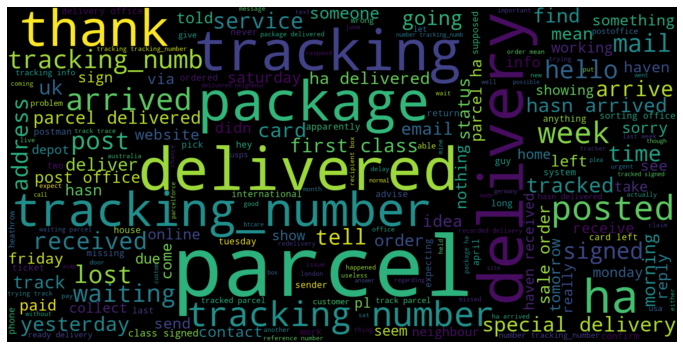

In [7]:
producewordCloud(cleanedtweets, 'Find My Item')

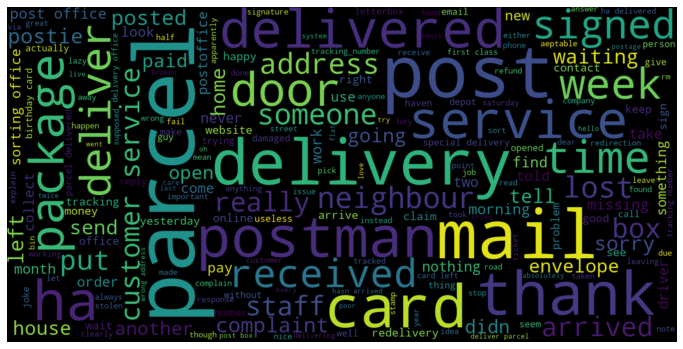

In [8]:
producewordCloud(cleanedtweets,'Complaint')

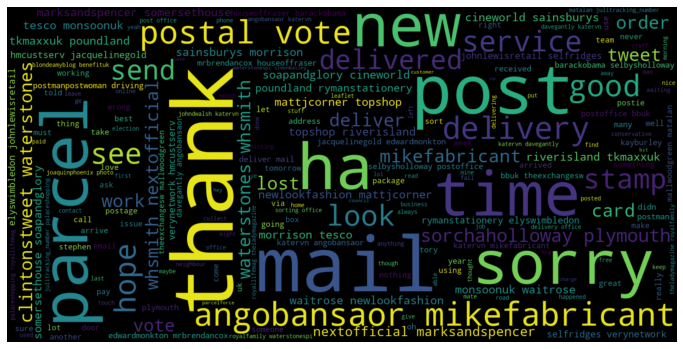

In [9]:
producewordCloud(cleanedtweets, 'Engagement')

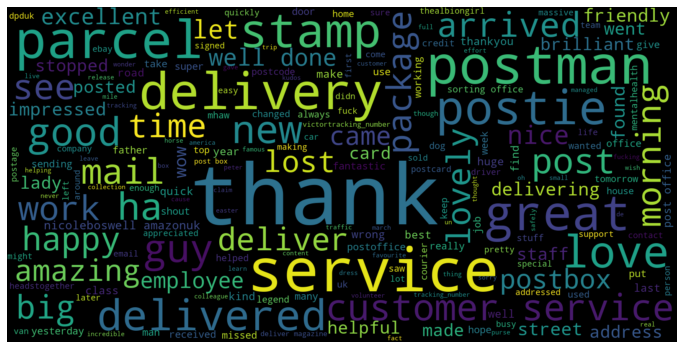

In [10]:
producewordCloud(cleanedtweets, 'Other')

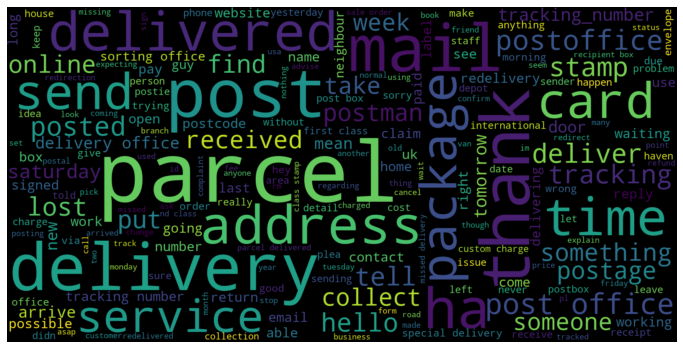

In [11]:
producewordCloud(cleanedtweets, 'Enquiry')

Produce Global feature dictionary

In [12]:
featureDict = {}
# Returns a dictionary containing features as keys, and weights as values

def tofeatureDict(tokens):
    v = {}
    for t in tokens:
        if t in featureDict:
            featureDict[t] = featureDict[t] + 1
        else: 
            featureDict[t] = 0 
        if t in v:
            v[t] = v[t] + 1
        else:
            v[t] = 1
    return v

In [13]:
def featuredictcategory(category):
    name = category + '_bagofwords'
    name = []
    category = categoriseTweets(cleanedtweets, category)
    for ( id,Tweet,label) in category:
        name.append((tofeatureDict(Tweet),label))

    return name

In [14]:
def sortedfeaturedictcategory(category):
    name = category + '_bagofwords'
    name = []
    category = categoriseTweets(cleanedtweets, category)
    for ( id,Tweet,label) in category:
        name.append((tofeatureDict(Tweet),label))
    #Show the top 50 most commons words
    sorted_x = sorted(featureDict.items(), key=operator.itemgetter(1))
     
    return sorted_x[-500:]

In [15]:
engagementfeaturedict = sortedfeaturedictcategory('Engagement')
engagementfeaturedict

[('woman', 8),
 ('reissue', 8),
 ('fire', 8),
 ('😁', 8),
 ('rachaelhxx', 8),
 ('front', 8),
 ('queue', 8),
 ('hate', 8),
 ('etc', 8),
 ('quick', 8),
 ('gt', 8),
 ('safe', 8),
 ('solvemymaths', 8),
 ('pick', 8),
 ('…', 8),
 ('🙏', 8),
 ('heart', 8),
 ('corporate', 8),
 ('richardavent', 8),
 ('discogs', 8),
 ('world', 9),
 ('advice', 9),
 ('plan', 9),
 ('hand', 9),
 ('cause', 9),
 ('outside', 9),
 ('🌈', 9),
 ('🏼', 9),
 ('anyway', 9),
 ('ah', 9),
 ('asap', 9),
 ('losing', 9),
 ('voter', 9),
 ('myhermes', 9),
 ('pic', 9),
 ('cannot', 9),
 ('person', 9),
 ('website', 9),
 ('poor', 9),
 ('receive', 9),
 ('trying', 9),
 ('true', 9),
 ('hopefully', 9),
 ('ups', 9),
 ('course', 9),
 ('privatisation', 9),
 ('given', 9),
 ('friend', 9),
 ('saw', 9),
 ('privatised', 9),
 ('bauble', 9),
 ('heard', 9),
 ('note', 9),
 ('krustyallslopp', 9),
 ('😱', 9),
 ('le', 9),
 ('mamapie', 9),
 ('brismithy', 9),
 ('pdannyh', 9),
 ('attacked', 9),
 ('postbox', 10),
 ('old', 10),
 ('congratulation', 10),
 ('support',

#### Tweet Text Visualisation
How different are the tokens in two of the different classes e.g ('complaint','Engagement')? Stop words will not help much as the same high-frequency works (such as 'the', 'to') will be equally frequent in both classes. If these stop words dominate both of the classes, then a meaningful result will be hard to obtain. The number of words will be limited as words which appear once will only add noise so the minimum number of occurences will be set to 10.

#### 3. Plot frequencies of word occurances for each different class

In [16]:
import seaborn as sns



def plotcategoryfrequencysns(category):
    name = category + 'featuredict'
    name = sortedfeaturedictcategory(category)
    name.sort(key=lambda x: x[1], reverse=True)
    # save the names and their respective scores separately
    # reverse the tuples to go from most frequent to least frequent 
    tokens = list(zip(*name))[0]
    frequency = list(zip(*name))[1]
    x_pos = np.arange(len(tokens))
    highesttoken = frequency[0]
    zipfs =[]

    #Caclualte zipfs law
    [zipfs.append(highesttoken * (1/i[0])) for i in enumerate(frequency) if i[0] > 0 ]
    zipfs.append(zipfs[-1])
    
    # calculate slope and intercept for the linear trend line
    slope, intercept = np.polyfit(x_pos, frequency, 1)
    trendline = intercept + (slope * x_pos)
    
    zipfs_df = pd.DataFrame(
    {'x_pos': x_pos,
     'frequency': frequency,
    })
    
    sns.set(style="whitegrid")
    

    ax = sns.barplot(x='x_pos', y="frequency",  data=zipfs_df)
    #ax.lineplot(x_pos, zipfs, color='blue', linewidth=2, markersize=12, label="Zipfs")
    ax.set_title("Top 500 tokens in Tweets")
    ax.set_xlabel('Top 500 {0} tokens'.format(category))
    ax.set_ylabel('Frequency')
    ax.set_xticks([])
    ax.legend()

    return ax

/Users/isobeljones/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.


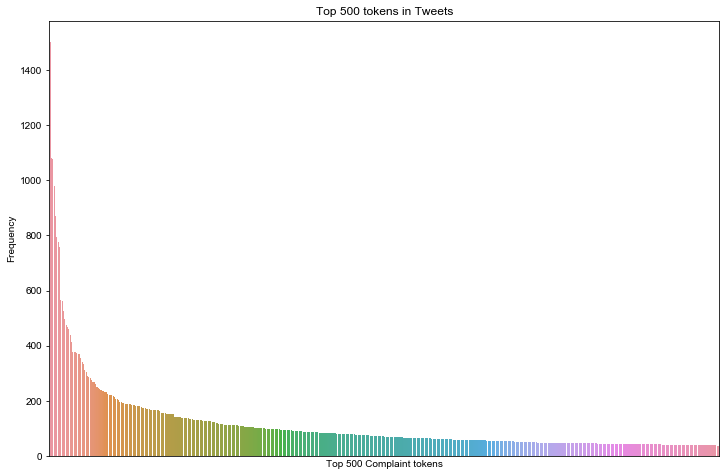

In [17]:
plt.subplots(figsize=(12,8))
plotcategoryfrequencysns('Complaint')

/Users/isobeljones/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.


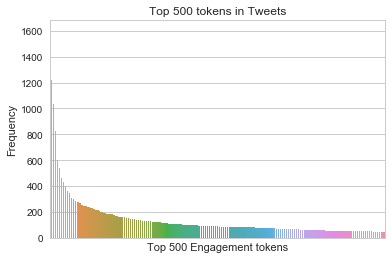

In [18]:
plotcategoryfrequencysns('Engagement')

/Users/isobeljones/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.


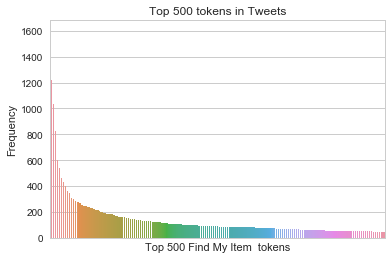

In [19]:
plotcategoryfrequencysns('Find My Item ')

In [20]:
def plotloglogzipfsns(category):
    name = category + 'featuredict'
    name = sortedfeaturedictcategory(category)
    name.sort(key=lambda x: x[1], reverse=True)
    # save the names and their respective scores separately
    # reverse the tuples to go from most frequent to least frequent 
    tokens = list(zip(*name))[0]
    frequency = list(zip(*name))[1]
    x_pos = np.arange(len(tokens))
    highesttoken = frequency[0]
    zipfs =[]

    #Caclualte zipfs law
    [zipfs.append(highesttoken * (1/i[0])) for i in enumerate(frequency) if i[0] > 0 ]
    zipfs.append(zipfs[-1])
    
    # calculate slope and intercept for the linear trend line
    slope, intercept = np.polyfit(x_pos, frequency, 1)
    trendline = intercept + (slope * x_pos)
    
    zipfs = zipfs[-499:]
    x_pos = x_pos[-499:]
    frequency = frequency[-499:]
    
    
    zipfs = [math.log10(x)for x in zipfs]
    x_pos = [math.log10(x) for x in x_pos]
    frequency = [math.log10(x) for x in frequency]
    
    zipfs_df = pd.DataFrame(
    {'x_pos': x_pos,
     'frequency': frequency,
    })
    
    sns.set(style="whitegrid")
    ax = sns.lineplot(x='x_pos', y="frequency",palette='GnBu',  data=zipfs_df,  label="LogLog ")
    ax.plot(x_pos, zipfs, color='blue', linewidth=2, markersize=12, label="Zipfs Law")
    ax.set_title("Zipf plot for tweets tokens")
    ax.set_xlabel('Absolute frequency of token')
    ax.set_ylabel('Frequency rank of token')
    #ax.set_xticks([])
    ax.legend()
    ax.set_yscale('log')
    return ax

#### 5. Plot CCDF of Token Frequency

In [25]:
import powerlaw

fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')


powerlaw.plot_ccdf(zipfs,color='b',label='zipfs distribution' )
powerlaw.plot_ccdf(frequency,color='g', label='Tweet distribution')
plt.xlabel("Token Frequency")
plt.ylabel("CCDF")
plt.title("CCDF of token lengths")
plt.legend()

NameError: name 'zipfs' is not defined

<Figure size 960x800 with 0 Axes>